<a href="https://colab.research.google.com/github/Hingo786/final-project/blob/main/FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mileage Prediction - Regression Analysis**

# **Objective**

1. Data Encoding
2. Feature Scaling
3. Handling Imbalance Data
a. Random Under Sampling
b. Random Over Sampling
4. Support Vector Machine Classifier
5. Grid Search for Hyperparameter Tunning

# **Data Source**

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

# **Import Library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

# **Import Data**

In [ ]:
df= pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

# **Describe Data**

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# **Data Visualization**

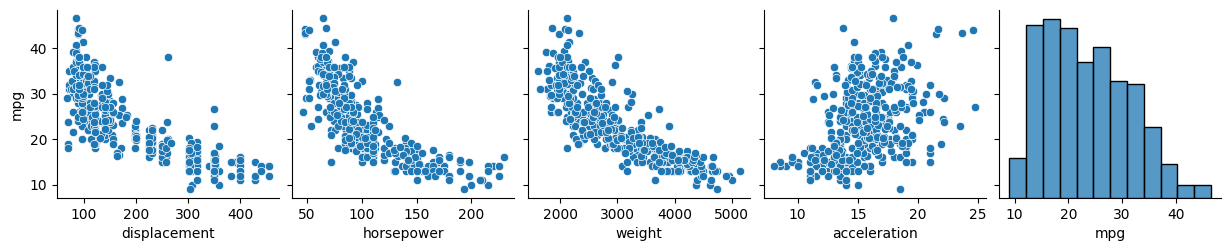

In [ ]:
sns.pairplot(df, x_vars= ['displacement','horsepower','weight','acceleration','mpg'], y_vars=['mpg']);

<Axes: xlabel='displacement', ylabel='mpg'>

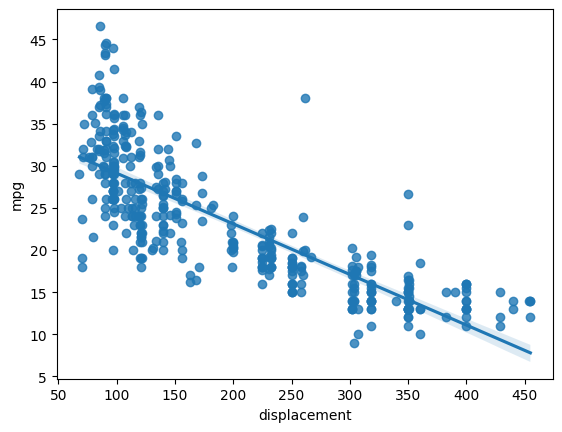

In [ ]:
sns.regplot(x = 'displacement',y='mpg',data=df)

# **Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.corr()

<ipython-input-41-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


# **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y = df ['mpg']

In [ ]:
y.shape

(392,)

In [ ]:
x=df[['displacement','horsepower','weight','acceleration']]

In [ ]:
x.shape

(392, 4)

In [ ]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7, random_state=2529)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((274, 4), (118, 4), (274,), (118,))

# **Modeling**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.intercept_

45.10570942699835

In [ ]:
model.coef_

array([-0.0101203 , -0.04389329, -0.00484238, -0.04171959])

#**scaling data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
x=ss.fit_transform(x)

In [ ]:
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

# **Prediction**

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

# **Model Evalution**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [ ]:
mean_absolute_error(y_test,y_pred)

3.3286968643244115

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.14713035779536746

In [ ]:
mean_squared_error(y_test,y_pred)

17.898948508488036

# **Explaination**

Source:
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

Data Set Information:
This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg', 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".
"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)
Attribute Information:
1.    mpg: continuous
2.    cylinders: multi-valued discrete
3.    displacement: continuous
4.    horsepower: continuous
5.    weight: continuous
6.    acceleration: continuous
7.    model year: multi-valued discrete
8.    origin: multi-valued discrete
9.    car name: string